## Step 1: **Downloading the data set**


1.   Unziping the data set (tar file)
2.   converting the audio into array by librosa



In [ ]:
!wget https://www.dropbox.com/s/4jw31k5mlzcmgis/genres.tar.gz?dl=0

--2021-03-18 11:06:43--  https://www.dropbox.com/s/4jw31k5mlzcmgis/genres.tar.gz?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/4jw31k5mlzcmgis/genres.tar.gz [following]
--2021-03-18 11:06:43--  https://www.dropbox.com/s/raw/4jw31k5mlzcmgis/genres.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6ca6bc950b782634de1a00c608.dl.dropboxusercontent.com/cd/0/inline/BK79-I8YqszZBizgscqI4tS-fgwHYDcfd-zeEYePNddfl3_UzKuELD-pMkkWTAPhGPHEbI1-FPDF9fEJ9E0almOc1789IUjmM-X4mWk01xnGv6WQCKVHTsHwnvKbunKT2zmXZRWyOPZbVwZ4KzMyzWuQ/file# [following]
--2021-03-18 11:06:44--  https://uc6ca6bc950b782634de1a00c608.dl.dropboxusercontent.com/cd/0/inline/BK79-I8YqszZBizgscqI4tS-fgwHYDcfd-zeEYePNddfl3_UzKuELD-pMkkWTAPhGPHEbI1-FPDF9fE

In [ ]:
!unzip /content/genres.tar.gz?dl=0

Archive:  /content/genres.tar.gz?dl=0
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/genres.tar.gz?dl=0 or
        /content/genres.tar.gz?dl=0.zip, and cannot find /content/genres.tar.gz?dl=0.ZIP, period.

No zipfiles found.


In [ ]:
!tar -xvf  '/content/genres.tar.gz?dl=0' 

genres/
genres/blues/
genres/blues/blues.00000.au
genres/blues/blues.00001.au
genres/blues/blues.00002.au
genres/blues/blues.00003.au
genres/blues/blues.00004.au
genres/blues/blues.00005.au
genres/blues/blues.00006.au
genres/blues/blues.00007.au
genres/blues/blues.00008.au
genres/blues/blues.00009.au
genres/blues/blues.00010.au
genres/blues/blues.00011.au
genres/blues/blues.00012.au
genres/blues/blues.00013.au
genres/blues/blues.00014.au
genres/blues/blues.00015.au
genres/blues/blues.00016.au
genres/blues/blues.00017.au
genres/blues/blues.00018.au
genres/blues/blues.00019.au
genres/blues/blues.00020.au
genres/blues/blues.00021.au
genres/blues/blues.00022.au
genres/blues/blues.00023.au
genres/blues/blues.00024.au
genres/blues/blues.00025.au
genres/blues/blues.00026.au
genres/blues/blues.00027.au
genres/blues/blues.00028.au
genres/blues/blues.00029.au
genres/blues/blues.00030.au
genres/blues/blues.00031.au
genres/blues/blues.00032.au
genres/blues/blues.00033.au
genres/blues/blues.00034.a

In [ ]:
pip install librosa

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

### **Note** :
**ERROR_RATE** --> Using an input table, returns a table that calculates the rate of incorrect classifications and displays them as FLOAT values

In [ ]:
import librosa
import librosa.display
import os

In [ ]:
clip, sample_rate= librosa.load('/content/genres/blues/blues.00000.au', sr=None)
clip=clip[:132300]

In [ ]:
clip

array([ 0.007324,  0.016602,  0.007629, -0.00351 , ...,  0.02713 ,  0.009186,  0.039642,  0.090302], dtype=float32)

## Step 2 : **Data pre-processing**

1.   Creating a function to convert the audio into spectogram of specific class or genre
2.  visualizing the data



In [ ]:
def create_spect(fold):
  spectogram_path=Path('/content/spectro1')
  os.makedirs(spectogram_path/fold,exist_ok=True)
  audio_path=Path('/content/genres/')
  for audio_file in list(Path(audio_path/fold).glob('*.au')):
    sample, sample_rate=librosa.load(audio_file, duration= 10.0)
    fig= plt.figure(figsize=[0.72,0.72])
    ax=fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    filename= spectogram_path/fold/Path(audio_file).name.replace('.au','.jpg')
    S= librosa.feature.melspectrogram(y=sample , sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    plt.savefig(filename, dpi=400, bbox_inches='tight', pad_inches=0)
    plt.close('all')
  

In [ ]:
classes=['country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
for genre in classes:
  create_spect(genre)

In [ ]:
path='/content/spectro1'

In [ ]:
data= (ImageList.from_folder(path)
.split_by_rand_pct(0.2)
.label_from_folder()
.transform([],size=224 )
.databunch(bs= 10)).normalize(imagenet_stats)

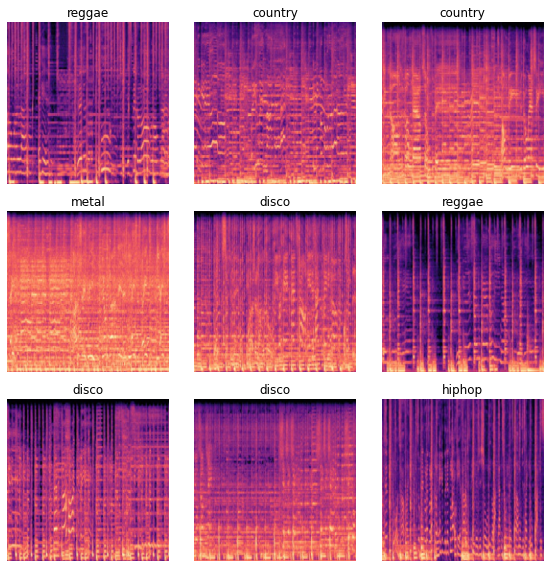

In [ ]:
data.show_batch(rows=3, figsize=(8,8))

In [ ]:
data

ImageDataBunch;

Train: LabelList (640 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
jazz,jazz,jazz,jazz,jazz
Path: /content/spectro1;

Valid: LabelList (160 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
rock,reggae,hiphop,country,metal
Path: /content/spectro1;

Test: None

## Step 3 : **Evaluvating the data using different pre trained model** 

1.   resnet34
2.   vgg19
3.   resnet152







## 1. resnet34



In [ ]:
learn=cnn_learner(data, models.resnet34, metrics= error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.fit_one_cycle(100)

epoch,train_loss,valid_loss,error_rate,time
0,2.913771,1.935700,0.656250,00:09
1,2.443583,1.619537,0.537500,00:08
2,2.052626,1.499833,0.506250,00:08
3,1.877882,1.370735,0.431250,00:08
4,1.640437,1.274215,0.362500,00:08
5,1.434904,1.315408,0.431250,00:08
6,1.268096,1.273131,0.412500,00:08
7,1.129069,1.373222,0.412500,00:08
8,0.993063,1.398316,0.475000,00:08
9,0.926355,1.346301,0.406250,00:08


In [ ]:
learn.save('Stage-1')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


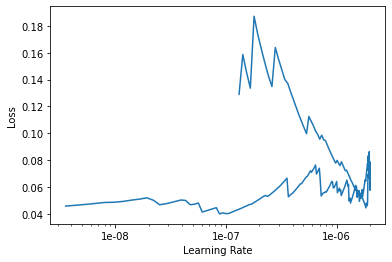

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(10, max_lr=slice(2e-06))

epoch,train_loss,valid_loss,error_rate,time
0,0.071243,1.904679,0.306250,00:12
1,0.035924,1.793538,0.306250,00:12
2,0.074519,1.828079,0.300000,00:12
3,0.042721,1.869685,0.325000,00:12
4,0.045212,1.879336,0.312500,00:12
5,0.056852,1.796260,0.300000,00:12
6,0.050488,1.957810,0.318750,00:12
7,0.052643,1.868197,0.306250,00:12
8,0.049344,1.908183,0.312500,00:12
9,0.082270,1.881812,0.312500,00:12


## **Error_rate :** 0.312500 (resnet34)

## 2.VGG19

In [ ]:
learn=cnn_learner(data, models.vgg19_bn, metrics= error_rate)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


In [ ]:
learn.fit_one_cycle(100)

epoch,train_loss,valid_loss,error_rate,time
0,2.984650,1.788285,0.681250,00:27
1,2.385445,1.521787,0.543750,00:24
2,1.955694,1.297883,0.412500,00:24
3,1.760184,1.264063,0.431250,00:24
4,1.476099,1.246661,0.400000,00:24
5,1.226413,1.318952,0.418750,00:24
6,1.124263,1.249845,0.393750,00:24
7,0.960971,1.176176,0.350000,00:24
8,0.879104,1.263852,0.381250,00:24
9,0.776231,1.343545,0.412500,00:24


In [ ]:
learn.save('Stage-1')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


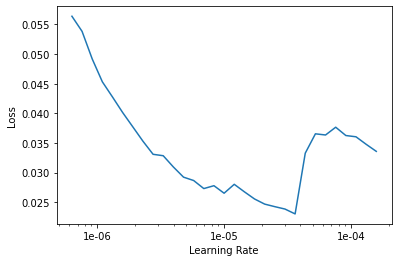

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(10, max_lr=slice(2e-06))

epoch,train_loss,valid_loss,error_rate,time
0,0.088517,1.931416,0.325000,00:31
1,0.062641,1.903028,0.300000,00:31
2,0.052822,1.889417,0.312500,00:31
3,0.047835,1.904400,0.312500,00:31
4,0.038122,2.019352,0.300000,00:31
5,0.039357,1.880556,0.300000,00:31
6,0.055392,1.882624,0.306250,00:31
7,0.046910,1.866884,0.306250,00:31
8,0.072594,1.865705,0.312500,00:31
9,0.066187,1.817453,0.287500,00:31


## **Error_rate :** 0.287500 (vgg19)

## 3.resnet152

In [ ]:
learn=cnn_learner(data, models.resnet152, metrics= error_rate)

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/hub/checkpoints/resnet152-b121ed2d.pth


In [ ]:
learn.fit_one_cycle(100)

epoch,train_loss,valid_loss,error_rate,time
0,2.414598,1.558134,0.518750,00:34
1,1.879922,1.288953,0.362500,00:32
2,1.469183,1.254762,0.381250,00:32
3,1.373369,1.214334,0.337500,00:32
4,1.185806,1.171511,0.337500,00:32
5,1.015256,1.247647,0.362500,00:32
6,0.927729,1.364923,0.418750,00:32
7,0.724995,1.409432,0.393750,00:32
8,0.700902,1.302586,0.362500,00:32
9,0.719994,1.296423,0.350000,00:32


In [ ]:
learn.save('Stage-1')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


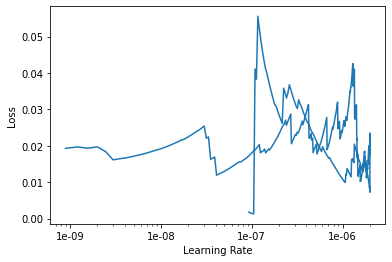

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(10, max_lr=slice(2e-06))

epoch,train_loss,valid_loss,error_rate,time
0,0.019924,1.745299,0.275000,00:44
1,0.016226,1.743054,0.262500,00:44
2,0.014518,1.866051,0.262500,00:44
3,0.015347,1.715413,0.268750,00:44
4,0.012038,1.737865,0.275000,00:44
5,0.036093,1.799542,0.275000,00:44
6,0.024633,1.838571,0.275000,00:44
7,0.027366,1.770015,0.275000,00:44
8,0.018289,1.731815,0.243750,00:44
9,0.017461,1.760498,0.262500,00:44


## **Error_rate :** 0.262500 (resnet152)